In [1]:
import numpy as np
from sdm_ml.dataset import BBSDataset
from sklearn.preprocessing import StandardScaler
from kernels import ard_rbf_kernel
import matplotlib.pyplot as plt
%matplotlib inline
from sksparse.cholmod import cholesky
import scipy.sparse as sps
from scipy.special import expit

In [2]:
csv_folder = '../../../multi_species/bbs/dataset/csv_bird_data/'
dataset = BBSDataset(csv_folder)

In [3]:
training_set = dataset.get_training_set()

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

covariates = scaler.fit_transform(training_set['covariates'].values)
outcomes = training_set['outcomes'][['American Crow', 'Brown-headed Cowbird']]

scaler = StandardScaler()

# Keep only the first 200 rows and 2 outcomes for this test
covariates = scaler.fit_transform(covariates.astype(np.float32))[:400, :]
outcomes = outcomes.values[:400, :2]

y_flat = np.reshape(outcomes[:, 0], (-1), order='F').astype(float)

/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


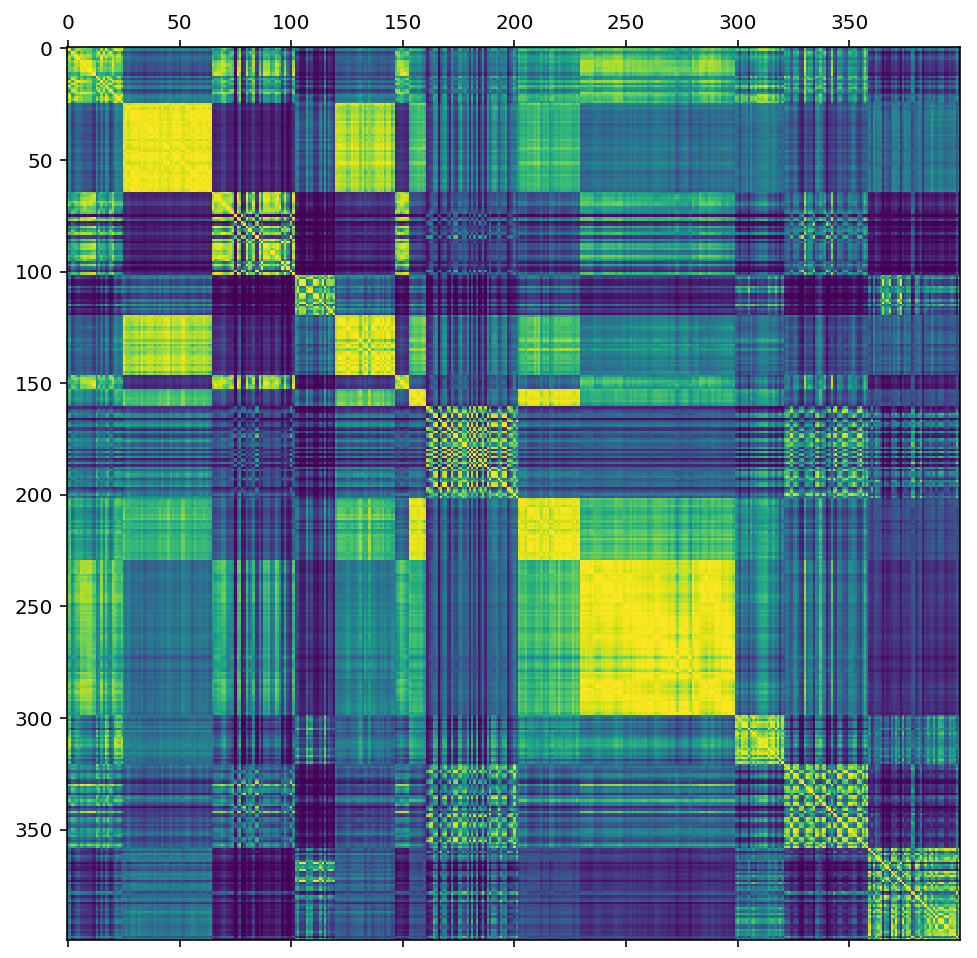

In [5]:
K1 = ard_rbf_kernel(covariates, covariates, np.linspace(2, 4, 8), 1., jitter=1e-5)
K2 = ard_rbf_kernel(covariates, covariates, np.linspace(3, 5, 8), 2., jitter=1e-5)

K = sps.block_diag([K1, K2], format='csc')

K = sps.csc_matrix(K1)

plt.matshow(K.todense())
plt.gcf().set_size_inches(8, 8)

In [6]:
# Try to follow R & W to the letter

In [7]:
f = np.zeros(K.shape[0])

In [8]:
probs = expit(f)
grad_log_y = y_flat - probs

W = sps.csc_matrix(np.diag(-probs * (probs - 1)))
W_sqrt = np.sqrt(W)
multiplied = W_sqrt.dot(K).dot(W_sqrt)
B = multiplied + sps.eye(K.shape[0], format='csc')

L = cholesky(B)
b = W.dot(f) + grad_log_y

first_solve = L.solve_L(W_sqrt.dot(K.dot(b)))
second_solve = L.solve_Lt(first_solve)

a = b - W_sqrt.dot(second_solve)

old_f = f
f = K.dot(a)

In [9]:
f

array([-6.16394494, -6.54994458, -4.53002429, -5.66845548, -6.08554813,
       -5.63645082, -5.88330865, -5.62937352, -5.63418163, -5.64682706,
       -5.78532343, -4.95372707, -4.90757166, -5.17781664, -4.47330383,
       -5.99401372, -4.87922248, -6.34675298, -5.57170078, -4.74440026,
       -5.53669108, -6.30162941, -6.47824459, -6.17323639, -6.10756581,
       -5.58707496, -5.35640504, -5.33790963, -5.24289058, -5.28042445,
       -5.35290566, -5.32213629, -5.24198483, -5.39909317, -4.99225642,
       -5.14399885, -5.27198429, -5.23302442, -5.22384786, -5.19842556,
       -5.18564632, -5.37185325, -5.41463119, -5.29951265, -5.32391846,
       -5.53412453, -5.3318151 , -5.33011581, -5.22244772, -5.37841471,
       -5.19985263, -5.5909437 , -5.52634376, -5.4146309 , -5.43300888,
       -5.28042199, -5.1175099 , -5.48911676, -5.22232684, -5.40548165,
       -5.36998927, -5.39655504, -5.37283834, -5.23286113, -5.1376248 ,
       -5.15228168, -4.7000529 , -4.9964241 , -5.04865112, -5.73

In [10]:
W.todense()

matrix([[0.25, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.25, 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.25, ..., 0.  , 0.  , 0.  ],
        ...,
        [0.  , 0.  , 0.  , ..., 0.25, 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.25, 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.25]])